In [3]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense, Flatten, Concatenate
import tensorflow as tf
import keras

### load data and pre-processing

In [4]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [5]:
type(train_X)

numpy.ndarray

In [6]:
print('train_X: ' + str(train_X.shape))
print('train_y: ' + str(train_y.shape))
print('test_X: ' + str(test_X.shape))
print('test_y: ' + str(test_y.shape))

train_X: (60000, 28, 28)
train_y: (60000,)
test_X: (10000, 28, 28)
test_y: (10000,)


In [7]:
### one-hot-encoding on the output y
train_y_ohe = np.zeros((train_y.size, 10))
train_y_ohe[np.arange(train_y.size), train_y] = 1

test_y_ohe = np.zeros((test_y.size, 10))
test_y_ohe[np.arange(test_y.size), test_y] = 1

### squential()

In [8]:
simple_sequential_model = keras.Sequential()
simple_sequential_model.add(Flatten(input_shape=(28, 28), name = 'flatten'))
simple_sequential_model.add(Dense(512, activation='relu', name = 'dense_1'))
simple_sequential_model.add(Dense(512, activation='relu', name = 'dense_2'))
simple_sequential_model.add(Dense(512, activation='relu', name = 'dense_3'))
simple_sequential_model.add(Dense(512, activation='relu', name = 'dense_4'))
simple_sequential_model.add(Dense(10, activation='softmax', name = 'classification'))

In [9]:
simple_sequential_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 classification (Dense)      (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
Non-

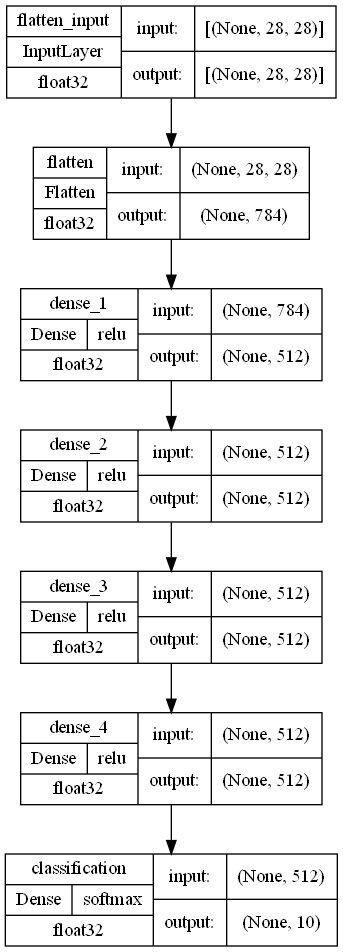

In [65]:
## Need pydot and graphviz for the keras.utils.plot_model to work.
## Use pip install pydot and conda install graphviz.
## For some reasons, pip install graphviz installs graphviz library, 
## but keras.utils.plot_model still won't work.

keras.utils.plot_model(simple_sequential_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

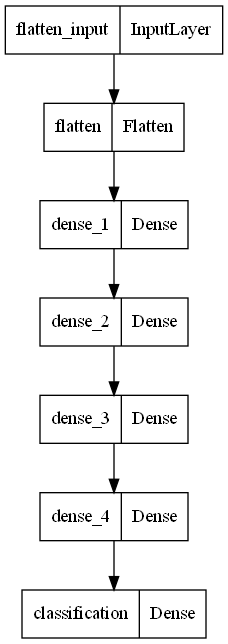

In [66]:
keras.utils.plot_model(simple_sequential_model)

In [10]:
%%time
simple_sequential_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_sequential_model.fit(train_X, train_y_ohe, validation_data=(test_X, test_y_ohe), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 4s 6ms/step - loss: 1.1678 - accuracy: 0.9040 - val_loss: 0.1704 - val_accuracy: 0.9480
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.1289 - accuracy: 0.9620 - val_loss: 0.1734 - val_accuracy: 0.9485
Epoch 3/3
469/469 [==============================] - 3s 5ms/step - loss: 0.0987 - accuracy: 0.9704 - val_loss: 0.1667 - val_accuracy: 0.9586
CPU times: total: 10.4 s
Wall time: 8.7 s


In [11]:
simple_sequential_model.predict(test_X)

313/313 [==============================] - 1s 2ms/step


array([[8.9246083e-11, 1.1060847e-11, 3.5790677e-08, ..., 1.0000000e+00,
        1.0865727e-12, 1.8232106e-08],
       [1.3712888e-07, 1.7951057e-05, 9.9997389e-01, ..., 1.7218580e-08,
        4.8109368e-06, 9.8410680e-08],
       [1.7840026e-05, 9.9865890e-01, 1.6807899e-06, ..., 1.5049416e-04,
        2.9951721e-04, 3.2494787e-05],
       ...,
       [2.3897237e-11, 1.8796015e-11, 4.8290558e-09, ..., 4.5774203e-07,
        2.6251705e-06, 5.5602035e-05],
       [5.7497427e-12, 2.1081326e-11, 9.1305869e-12, ..., 3.6833170e-09,
        7.2003830e-05, 2.2932731e-10],
       [2.8138939e-14, 3.1305944e-17, 4.5734459e-16, ..., 3.8841544e-18,
        5.1077900e-17, 6.9801666e-16]], dtype=float32)

### functional API --- simple sequential

In [69]:
inputs = keras.Input(shape=(28, 28), name = 'input')
x = Flatten(name = 'flatten')(inputs)
x = Dense(512, activation='relu', name = 'dense_1')(x)
x = Dense(512, activation='relu', name = 'dense_2')(x)
x = Dense(512, activation='relu', name = 'dense_3')(x)
x = Dense(512, activation='relu', name = 'dense_4')(x)
outputs = Dense(10, activation='softmax', name = 'classification')(x)

In [70]:
functional_api_model = keras.Model(inputs=inputs, outputs=outputs)

In [71]:
functional_api_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 classification (Dense)      (None, 10)                5130

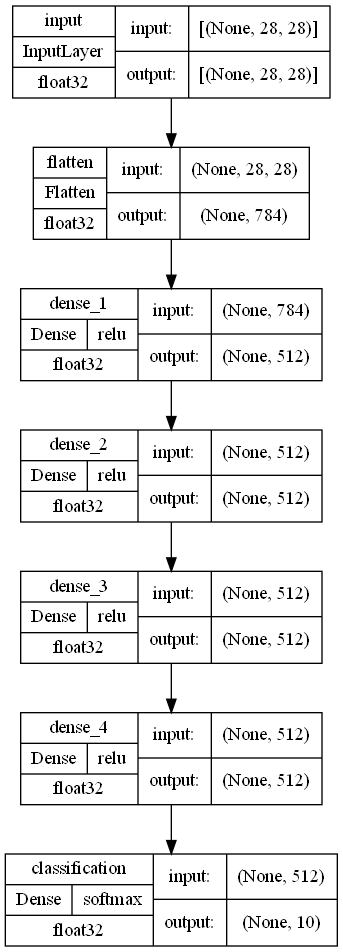

In [72]:
keras.utils.plot_model(functional_api_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

In [73]:
%%time
functional_api_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
functional_api_model.fit(train_X, train_y_ohe, validation_data=(test_X, test_y_ohe), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 3s 5ms/step - loss: 1.3200 - accuracy: 0.8948 - val_loss: 0.1729 - val_accuracy: 0.9473
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.1396 - accuracy: 0.9591 - val_loss: 0.1427 - val_accuracy: 0.9571
Epoch 3/3
469/469 [==============================] - 3s 7ms/step - loss: 0.0925 - accuracy: 0.9717 - val_loss: 0.1630 - val_accuracy: 0.9569
CPU times: total: 10.4 s
Wall time: 8.79 s


In [74]:
functional_api_model.predict(test_X)

313/313 [==============================] - 1s 2ms/step


array([[1.3882498e-06, 3.5550465e-07, 2.7665335e-08, ..., 9.9784899e-01,
        9.0664614e-08, 1.7880661e-06],
       [3.4152739e-12, 1.4882958e-13, 1.0000000e+00, ..., 3.6962354e-17,
        1.5855061e-14, 2.6234126e-18],
       [1.1209527e-07, 9.9999714e-01, 9.9137729e-08, ..., 3.0333367e-09,
        2.3886554e-07, 1.5889835e-06],
       ...,
       [1.2679544e-12, 6.5363076e-11, 1.1715203e-14, ..., 1.3306293e-07,
        2.8128067e-08, 3.7690754e-07],
       [7.1879285e-08, 2.4669924e-07, 5.0378073e-11, ..., 3.8978341e-11,
        8.1933094e-06, 4.2141759e-12],
       [2.8620075e-11, 1.5127727e-15, 8.9728802e-14, ..., 2.7092521e-17,
        9.1086865e-15, 2.0605409e-16]], dtype=float32)

### functional API --- branched layers

In [12]:
inputs = keras.Input(shape=(28, 28), name = 'input')
x = Flatten(name = 'flatten')(inputs)
x_brach1 = Dense(512, activation='relu', name = 'dense_1')(x)
x_brach2 = Dense(512, activation='relu', name = 'dense_2')(x)
x_brach1 = Dense(512, activation='relu', name = 'dense_3')(x_brach1)
x_brach2 = Dense(512, activation='relu', name = 'dense_4')(x_brach2)
outputs = Dense(10, activation='softmax', name = 'classification')(x_brach1 + x_brach2)

functional_api_branch_model = keras.Model(inputs=inputs, outputs=outputs)

In [76]:
functional_api_branch_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 512)          401920      ['flatten[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 512)          401920      ['flatten[0][0]']                
                                                                                           

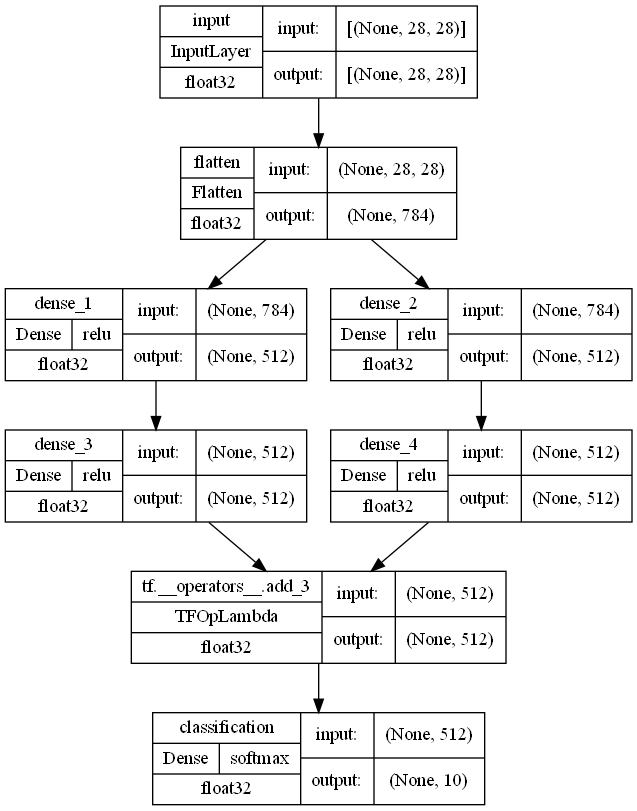

In [77]:
keras.utils.plot_model(functional_api_branch_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

In [78]:
%%time
functional_api_branch_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
functional_api_branch_model.fit(train_X, train_y_ohe, validation_data=(test_X, test_y_ohe), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 3s 6ms/step - loss: 5.6002 - accuracy: 0.9083 - val_loss: 0.6971 - val_accuracy: 0.9456
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.4335 - accuracy: 0.9564 - val_loss: 0.5501 - val_accuracy: 0.9497
Epoch 3/3
469/469 [==============================] - 4s 8ms/step - loss: 0.2999 - accuracy: 0.9674 - val_loss: 0.5134 - val_accuracy: 0.9561
CPU times: total: 10.5 s
Wall time: 8.99 s


In [79]:
inputs = keras.Input(shape=(28, 28), name = 'input')
x = Flatten(name = 'flatten')(inputs)
x_brach1 = Dense(512, activation='relu', name = 'dense_1')(x)
x_brach2 = Dense(512, activation='relu', name = 'dense_2')(x)
x_brach1 = Dense(512, activation='relu', name = 'dense_3')(x_brach1)
x_brach2 = Dense(512, activation='relu', name = 'dense_4')(x_brach2)
concat = Concatenate(axis=1, name = 'concat')([x_brach1, x_brach2])
outputs = Dense(10, activation='softmax', name = 'classification')(concat)

functional_api_branch_model = keras.Model(inputs=inputs, outputs=outputs)

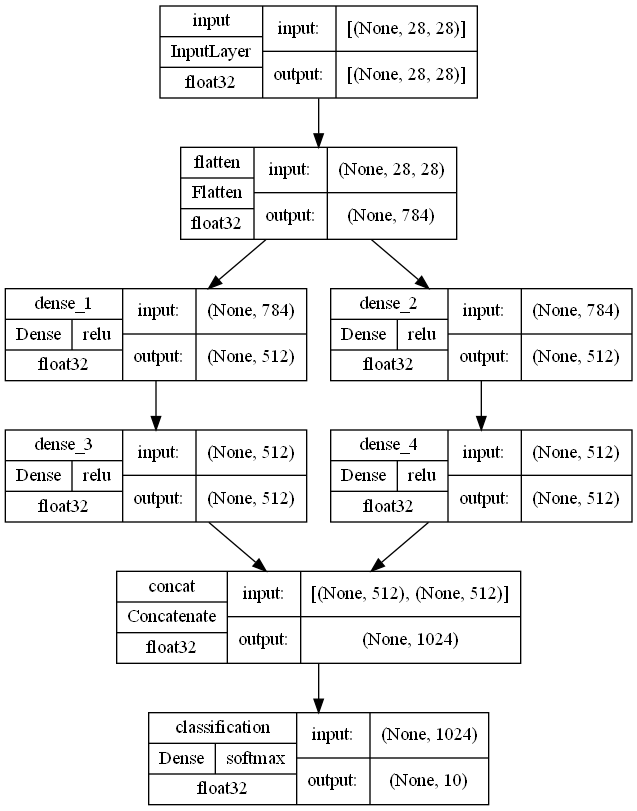

In [80]:
keras.utils.plot_model(functional_api_branch_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

### functional API --- residual net

In [81]:
inputs = keras.Input(shape=(28, 28), name = 'input')
x_1 = Flatten(name = 'flatten')(inputs)
first_layer_output = Dense(512, activation='relu', name = 'dense_1')(x_1)
x_2 = Dense(512, activation='relu', name = 'dense_2')(first_layer_output)
x_2 = Dense(512, activation='relu', name = 'dense_3')(x_2)
x_2 = Dense(512, activation='relu', name = 'dense_4')(x_2)
outputs = Dense(10, activation='softmax', name = 'classification')(first_layer_output + x_2)

functional_api_residual_model = keras.Model(inputs=inputs, outputs=outputs)

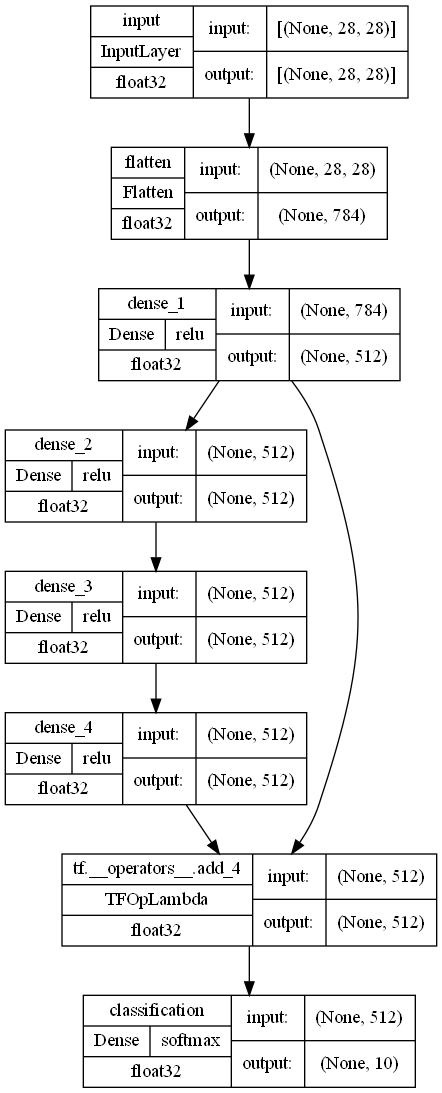

In [82]:
keras.utils.plot_model(functional_api_residual_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

In [83]:
%%time
functional_api_residual_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
functional_api_residual_model.fit(train_X, train_y_ohe, validation_data=(test_X, test_y_ohe), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 3s 6ms/step - loss: 4.8488 - accuracy: 0.9046 - val_loss: 0.9924 - val_accuracy: 0.9353
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.5276 - accuracy: 0.9562 - val_loss: 0.6415 - val_accuracy: 0.9459
Epoch 3/3
469/469 [==============================] - 3s 7ms/step - loss: 0.2869 - accuracy: 0.9668 - val_loss: 0.5184 - val_accuracy: 0.9548
CPU times: total: 10.8 s
Wall time: 8.82 s


### functional API --- mulit-outputs

In [13]:
inputs = keras.Input(shape=(28, 28), name = 'input')
x_1 = Flatten(name = 'flatten')(inputs)
x_1 = Dense(512, activation='relu', name = 'dense_1')(x_1)
x_1 = Dense(512, activation='relu', name = 'dense_2')(x_1)
third_layer_output = Dense(512, activation='relu', name = 'dense_3')(x_1)
outputs_1 = Dense(10, activation='softmax', name = 'classification_1')(third_layer_output)
x_2 = Dense(512, activation='relu', name = 'dense_4')(third_layer_output)
outputs_2 = Dense(10, activation='softmax', name = 'classification_2')(x_2)

functional_api_multi_outputs_model = keras.Model(inputs = inputs, outputs = [outputs_1, outputs_2])

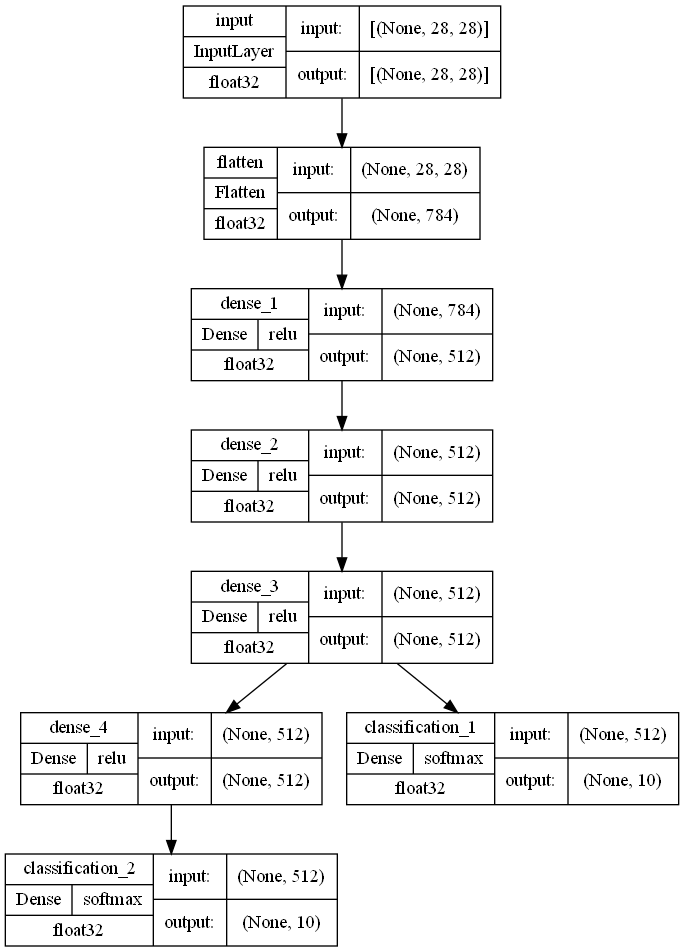

In [14]:
keras.utils.plot_model(functional_api_multi_outputs_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

In [15]:
%%time
functional_api_multi_outputs_model.compile(optimizer='adam', \
                                      loss=['categorical_crossentropy', 'categorical_crossentropy'],\
                                      metrics=['accuracy'])
functional_api_multi_outputs_model.fit(train_X, [train_y_ohe, train_y_ohe], \
                                  validation_data=(test_X, [test_y_ohe, test_y_ohe]), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 4s 7ms/step - loss: 2.5268 - classification_1_loss: 1.3047 - classification_2_loss: 1.2221 - classification_1_accuracy: 0.9018 - classification_2_accuracy: 0.8963 - val_loss: 0.3735 - val_classification_1_loss: 0.1962 - val_classification_2_loss: 0.1773 - val_classification_1_accuracy: 0.9491 - val_classification_2_accuracy: 0.9479
Epoch 2/3
469/469 [==============================] - 3s 7ms/step - loss: 0.2660 - classification_1_loss: 0.1400 - classification_2_loss: 0.1261 - classification_1_accuracy: 0.9622 - classification_2_accuracy: 0.9617 - val_loss: 0.3013 - val_classification_1_loss: 0.1613 - val_classification_2_loss: 0.1400 - val_classification_1_accuracy: 0.9598 - val_classification_2_accuracy: 0.9616
Epoch 3/3
469/469 [==============================] - 3s 7ms/step - loss: 0.1956 - classification_1_loss: 0.1011 - classification_2_loss: 0.0945 - classification_1_accuracy: 0.9719 - classification_2_accuracy: 0.9708 - val_loss

### functional API --- mulit-inputs

In [16]:
inputs_1 = keras.Input(shape=(28, 28), name = 'input_1')
inputs_2 = keras.Input(shape=(28, 28), name = 'input_2')
x_1 = Flatten(name = 'flatten_1')(inputs_1)
x_1 = Dense(512, activation='relu', name = 'dense_1')(x_1)
x_1 = Dense(512, activation='relu', name = 'dense_2')(x_1)

x_2 = Flatten(name = 'flatten_2')(inputs_2)
x_2 = Dense(512, activation='relu', name = 'dense_3')(x_2)
x_2 = Dense(512, activation='relu', name = 'dense_4')(x_2)

outputs = Dense(10, activation='softmax', name = 'classification_2')(x_1 + x_2)

functional_api_multi_inputs_model = keras.Model(inputs = [inputs_1, inputs_2], outputs= outputs)

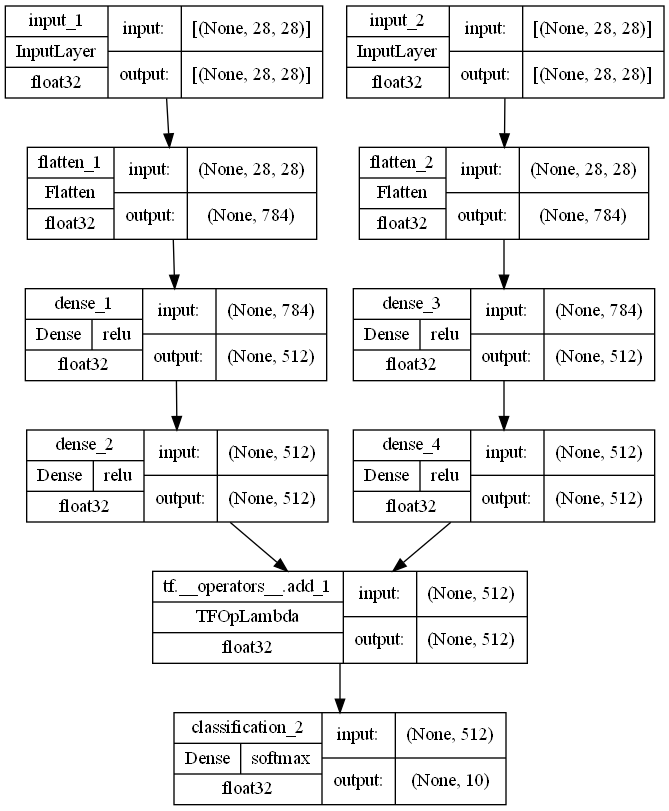

In [17]:
keras.utils.plot_model(functional_api_multi_inputs_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

In [18]:
%%time
functional_api_multi_inputs_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
functional_api_multi_inputs_model.fit([train_X, train_X], train_y_ohe, validation_data=([test_X, test_X], test_y_ohe), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 3s 6ms/step - loss: 4.6309 - accuracy: 0.9104 - val_loss: 0.6735 - val_accuracy: 0.9480
Epoch 2/3
469/469 [==============================] - 3s 5ms/step - loss: 0.4711 - accuracy: 0.9583 - val_loss: 0.6545 - val_accuracy: 0.9512
Epoch 3/3
469/469 [==============================] - 3s 5ms/step - loss: 0.3437 - accuracy: 0.9665 - val_loss: 0.6035 - val_accuracy: 0.9461
CPU times: total: 10.8 s
Wall time: 8.45 s


### partial model and transfer learning

In [19]:
partial_model = keras.Model(inputs = functional_api_multi_inputs_model.input[0], \
                            outputs= functional_api_multi_inputs_model.get_layer('dense_2').output, \
                            name = 'partial_model'
                           )

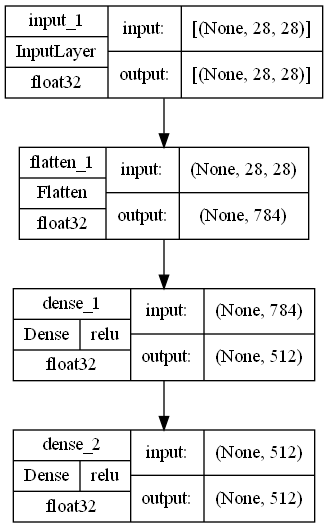

In [20]:
keras.utils.plot_model(partial_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

In [21]:
partial_model.predict(test_X)

313/313 [==============================] - 0s 1ms/step


array([[ 0.      ,  0.      ,  0.      , ...,  0.      , 62.735283,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ..., 42.841084,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      , 12.434238,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  7.695917,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [26]:
partial_model.trainable = False

In [27]:
inputs_1 = keras.Input(shape=(28, 28), name = 'input_1')
x = partial_model(inputs_1)
x = Dense(512, activation='relu', name = 'dense_5')(x)
final_output = Dense(10, activation='softmax', name = 'classification')(x)

In [28]:
transfer_learning_model = keras.Model(inputs = inputs_1 , \
                                      outputs = final_output
                                     )

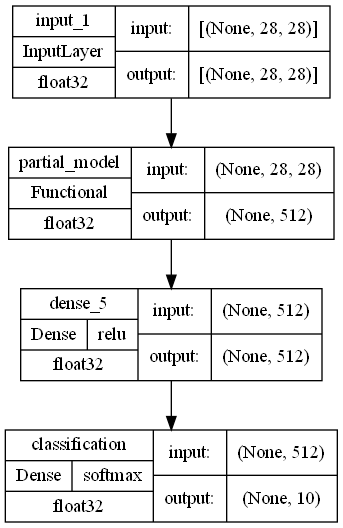

In [96]:
keras.utils.plot_model(transfer_learning_model,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

In [97]:
transfer_learning_model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 partial_model (Functional)  (None, 512)               664576    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 classification (Dense)      (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 267,786
Non-trainable params: 664,576
_________________________________________________________________


In [29]:
%%time
transfer_learning_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_learning_model.fit(train_X, train_y_ohe, validation_data=(test_X, test_y_ohe), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 2s 4ms/step - loss: 0.3656 - accuracy: 0.9374 - val_loss: 0.2833 - val_accuracy: 0.9454
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.1025 - accuracy: 0.9714 - val_loss: 0.2409 - val_accuracy: 0.9521
Epoch 3/3
469/469 [==============================] - 2s 4ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.2491 - val_accuracy: 0.9565
CPU times: total: 8.38 s
Wall time: 6.31 s


### subclassing

In [30]:
class subclassing_model(keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten(name = 'flatten')
        self.dense_1 = Dense(512, activation='relu', name = 'dense_1')
        self.dense_2 = Dense(512, activation='relu', name = 'dense_2')
        self.dense_3 = Dense(512, activation='relu', name = 'dense_3')
        self.dense_4 = Dense(512, activation='relu', name = 'dense_4')
        self.classification = Dense(10, activation='softmax', name = 'classification')
        
    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        x = self.dense_4(x)
        outputs = self.classification(x)
        
        return outputs

In [31]:
subclassing_model_instance = subclassing_model()

In [32]:
subclassing_model_instance.build(input_shape = (None, 28, 28))

In [33]:
subclassing_model_instance.summary()

Model: "subclassing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  401920    
                                                                 
 dense_2 (Dense)             multiple                  262656    
                                                                 
 dense_3 (Dense)             multiple                  262656    
                                                                 
 dense_4 (Dense)             multiple                  262656    
                                                                 
 classification (Dense)      multiple                  5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,0

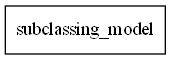

In [34]:
keras.utils.plot_model(subclassing_model_instance,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

In [35]:
%%time
subclassing_model_instance.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
subclassing_model_instance.fit(train_X, train_y_ohe, validation_data=(test_X, test_y_ohe), epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 3s 5ms/step - loss: 1.3701 - accuracy: 0.8979 - val_loss: 0.1729 - val_accuracy: 0.9506
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.1279 - accuracy: 0.9612 - val_loss: 0.1439 - val_accuracy: 0.9574
Epoch 3/3
469/469 [==============================] - 2s 5ms/step - loss: 0.1028 - accuracy: 0.9695 - val_loss: 0.1587 - val_accuracy: 0.9558
CPU times: total: 9.69 s
Wall time: 7.71 s


### plot_model and summary workaround

In [36]:
class subclassing_model(keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten(name = 'flatten')
        self.dense_1 = Dense(512, activation='relu', name = 'dense_1')
        self.dense_2 = Dense(512, activation='relu', name = 'dense_2')
        self.dense_3 = Dense(512, activation='relu', name = 'dense_3')
        self.dense_4 = Dense(512, activation='relu', name = 'dense_4')
        self.classification = Dense(10, activation='softmax', name = 'classification')
        
    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        x = self.dense_4(x)
        outputs = self.classification(x)
        
        return outputs
    
    def workaround_model(self):
        x = keras.Input(shape=(28, 28), name = 'input')
        return keras.Model(inputs = x, outputs=self.call(x))

In [37]:
subclassing_model_instance = subclassing_model()

In [38]:
subclassing_model_instance.workaround_model().summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 classification (Dense)      (None, 10)                5130

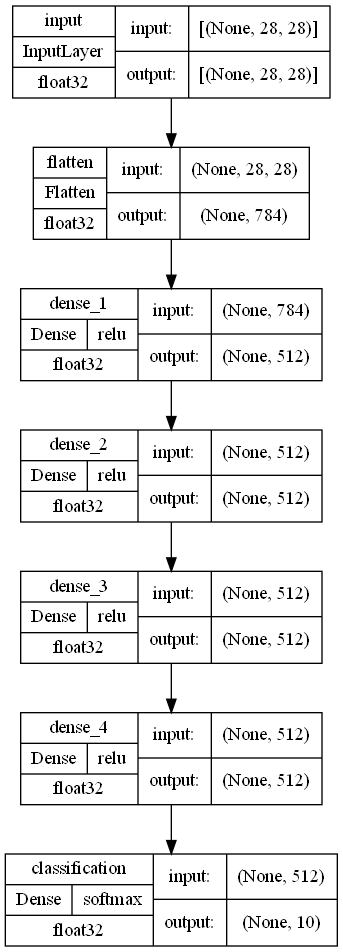

In [39]:
keras.utils.plot_model(subclassing_model_instance.workaround_model(),
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True
                      )

### dynamic dense layer numbers

In [40]:
class subclassing_model(keras.Model):
    def __init__(self, num_dense_layers):
        super().__init__()
        self.num_dense_layers = num_dense_layers
        self.flatten = Flatten(name = 'flatten')
        self.dense = []
        for i in range(self.num_dense_layers):
            self.dense.append(Dense(512, activation='relu', name = 'dense_' + str(i+1)))
        self.classification = Dense(10, activation='softmax', name = 'classification')
        
    def call(self, inputs):
        x = self.flatten(inputs)
        for i in range(self.num_dense_layers):
            x = self.dense[i](x)
        outputs = self.classification(x)
        
        return outputs

In [41]:
subclassing_model_instance = subclassing_model(10)

In [42]:
subclassing_model_instance.build(input_shape = (None, 28, 28))

In [43]:
subclassing_model_instance.summary()

Model: "subclassing_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  401920    
                                                                 
 dense_2 (Dense)             multiple                  262656    
                                                                 
 dense_3 (Dense)             multiple                  262656    
                                                                 
 dense_4 (Dense)             multiple                  262656    
                                                                 
 dense_5 (Dense)             multiple                  262656    
                                                                 
 dense_6 (Dense)             multiple          